<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ejercicio-1---Análisis-del-riesgo-Proyecto-PortaCom" data-toc-modified-id="Ejercicio-1---Análisis-del-riesgo-Proyecto-PortaCom-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ejercicio 1 - Análisis del riesgo Proyecto PortaCom</a></span></li></ul></div>

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 1 - Análisis del riesgo Proyecto PortaCom

1. Este ejercicio requiere que simulemos tres valores:

*  **Costo de mano de obra directo:**  PortaCom cree que el costo de la mano de obra directa oscilará desde 43 US hasta 47 US por unidad y está descrita por la distribución de probabilidad discreta mostrada en la siguiente tabla:
|Costo|Prob|
|:---:|:---:|
|43 US\$ |0.1|
|44 US\$ |0.2|
|45 US\$ |0.4|
|46 US\$ |0.2|
|47 US\$ |0.1|

* **Costo de las piezas**: Este costo depende de la economía general, la demanda de las piezas y la política de fi jación de precios de los proveedores de piezas de PortaCom. Esta empresa cree que el costo de las piezas oscilará desde  80 US  hasta 100 US por unidad y está descrito por una distribución de probabilidad uniforme.

* **Demanda durante el primer año:** PortaCom cree que la demanda durante el primer año está descrita por la distribución de probabilidad normal. El valor medio o esperado de la demanda durante el primer año es de 15.000 unidades. La desviación estándar, de 4500 unidades.

2. Con estos valores, la idea es calcular la utilidad del primer año, dicho cálculo se resume en el siguiente diagrama de flujo:

![im1](https://raw.githubusercontent.com/MCG-Externado/MateBasicas-MCG1/master/imagenes/imSim.png)

Fijemos los valores fijos:

In [4]:
precio_unitario=249
costo_admin=400000
costo_pub=600000

Ahora, usando una simulación, calculemos el costo de mano de obra directa, para este ejercicio utilizamos la herramienta `np.random.uniform` para generar valores entre 0 y 1 de manera uniforme y  un programa que a partir de la distribución descrita determine los valores entre 43 y 47.



In [5]:
uniform_value=np.random.uniform(0,1)


if uniform_value<0.1:
    cmo=43
elif uniform_value<0.3:
    cmo=44
elif uniform_value <0.7:
    cmo=45
elif uniform_value<0.9:
    cmo=46
else:
    cmo=47
    
print('En esta ejecución el costo de mano de obra es ',cmo)

En esta ejecución el costo de mano de obra es  45


Así mismo calculamos el costo de piezas, usamos `np.random.randint(low,high)`, una función que escoge aleatoriamente números enteros entre `low` y `high`usando una distribuciṕn uniforme :

In [6]:
cp=np.random.randint(80,100)

Finalmente determnamos la demanda, usamos de manera similar la función `np.random.normal(mean,std)` con media `mean` y desviación estándar `std`, también `round` para tomar el número entero más cercano.

In [7]:
dm=round(np.random.normal(15000,4500))

Los valores simulados son:

In [8]:
print('Costo de mano de obra ',cmo)
print('Costo de piezas ',cp)
print('Demanda ',dm)

Costo de mano de obra  45
Costo de piezas  83
Demanda  10505


Vamos a poner todos esos valores en una misma celda y calculamos la utilidad:

In [9]:
precio_unitario=249
costo_admin=400000
costo_pub=600000
uniform_value=np.random.uniform(0,1)


if uniform_value<0.1:
    cmo=43
elif uniform_value<0.3:
    cmo=44
elif uniform_value <0.7:
    res=45
elif uniform_value<0.9:
    cmo=46
else:
    cmo=47
cp=np.random.randint(80,100)
dm=round(np.random.normal(15000,4500))

#Usamos la fórmula de utilidad

U=(precio_unitario-cmo-cp)*dm -costo_admin-costo_pub

print('En este ejercicio con costos unitario de mano de obra',cmo,'$, con costo de piezas ',cp ,'$ y demanda ',dm,'\nLa utilidad es de',U,'$') 

En este ejercicio con costos unitario de mano de obra 47 $, con costo de piezas  82 $ y demanda  16783 
La utilidad es de 1013960 $


Si ejecuta nuevamente la celda anterior obtendrá una nueva utilidad.

Guademos 100 simulaciones con un `for`: 

In [18]:
#Lista de valores simulados
cmo_list=[] #Lista de cmo
cp_list=[] #Lista de cp
dm_list=[] #Lista de dm
U_list=[] #Lista de utilidades
for i in range(1000):
    precio_unitario=249
    costo_admin=400000
    costo_pub=600000
    
    
    uniform_value=np.random.uniform(0,1)
    
    #CMO
    if uniform_value<0.1:
        cmo=43
    elif uniform_value<0.3:
        cmo=44
    elif uniform_value <0.7:
        cmo=45
    elif uniform_value<0.9:
        cmo=46
    else:
        cmo=47
    cmo_list.append(cmo) #Guardamos el cmo
    #CP
    cp=np.random.randint(80,100)
    cp_list.append(cp) #Guardamos el cp
    
    #dm
    dm=round(np.random.normal(15000,4500))
    dm_list.append(dm)
    
    #Usamos la fórmula de utilidad
    U=(precio_unitario)*dm -((cp+ cmo)*dm +costo_admin+costo_pub)
    U_list.append(U)
    
#Finalmente guardamos todo en una base:

TODO=pd.DataFrame({'Costo Mano de Obra':cmo_list,'Costo Piezas':cp_list,'Demanda':dm_list,'Utilidades':U_list})
TODO

,Costo Mano de Obra,Costo Piezas,Demanda,Utilidades
0,44,92,2545,-712415
1,46,99,14877,547208
2,45,95,7069,-229479
3,46,80,16727,1057421
4,44,84,22930,1774530
...,...,...,...,...
995,43,80,8611,84986
996,44,91,24876,1835864
997,45,94,15231,675410
998,44,82,16089,978947


Algunos gráficos:

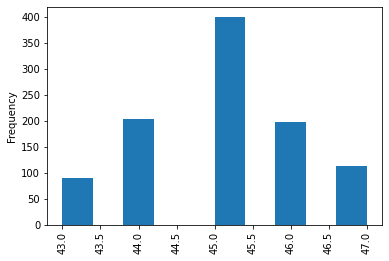

In [17]:
#CMO

TODO['Costo Mano de Obra'].plot.hist()
plt.xticks(rotation='90')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.show()

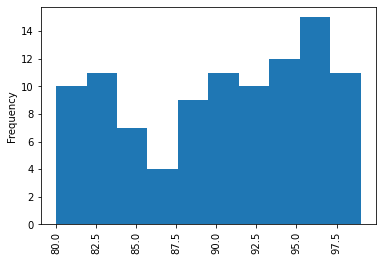

In [12]:
#CP

TODO['Costo Piezas'].plot.hist()
plt.xticks(rotation='90')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.show()

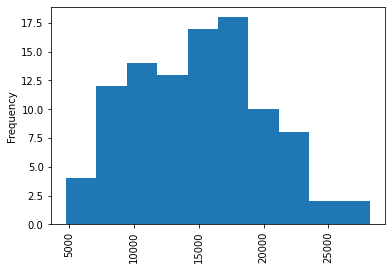

In [13]:
#Demanda

TODO['Demanda'].plot.hist()
plt.xticks(rotation='90')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.show()

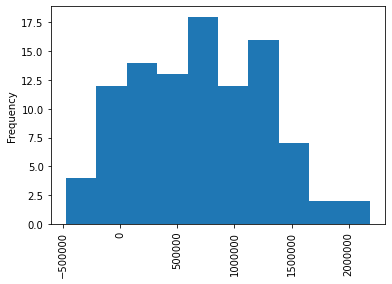

In [14]:
#Utilidades
TODO['Utilidades'].plot.hist()
plt.xticks(rotation='90')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.show()

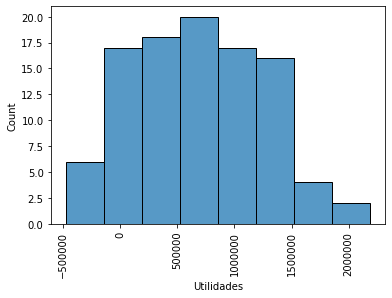

In [15]:
#Utilidades más bonito

sns.histplot(data=TODO['Utilidades'])
plt.xticks(rotation='90')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)